# Using signals to obtain MFCC Features

In [127]:
! dir

 Volume in drive C is Windows
 Volume Serial Number is 0C09-7045

 Directory of C:\Users\Jonathan\Desktop\STA141C_Project

06/09/2019  12:54 PM    <DIR>          .
06/09/2019  12:54 PM    <DIR>          ..
06/09/2019  12:38 PM    <DIR>          .ipynb_checkpoints
06/09/2019  08:54 AM        25,423,950 21_Savage_-_Partments_Slaughter_King_2015_+_DOWNLOAD-VbCY_3mWXec.wav
06/08/2019  03:40 PM             5,441 artists.txt
06/08/2019  03:40 PM        30,863,438 AtTheClub.wav
06/09/2019  12:54 PM            62,689 audio-data-and-RF.ipynb
06/09/2019  08:59 AM            12,659 audio-RF.ipynb
06/08/2019  03:40 PM           106,820 BillboardAPI_EDA.ipynb
06/08/2019  03:40 PM         7,326,487 Cleaned_data.pkl
06/08/2019  03:40 PM               236 combiningFunction.R
06/09/2019  08:54 AM         9,273,422 DaBaby_-_Kujo-U5rk2qASIOI.wav
06/09/2019  08:54 AM        26,067,022 Denzel_Curry_-_SHAKE_88_feat._Sam_Sneak-ltN58roAM5c.wav
06/08/2019  03:40 PM             6,176 Final Data Creation.ipynb
0

In [71]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

* signal – the audio signal from which to compute features. Should be an N*1 array
* samplerate – the samplerate of the signal we are working with.
* winlen – the length of the analysis window in seconds. Default is 0.025s (25 milliseconds)
* winstep – the step between successive windows in seconds. Default is 0.01s (10 milliseconds)
* numcep – the number of cepstrum to return, default 13
* nfilt – the number of filters in the filterbank, default 26.
* nfft – the FFT size. Default is 512.
* lowfreq – lowest band edge of mel filters. In Hz, default is 0.
* highfreq – highest band edge of mel filters. In Hz, default is samplerate/2
* preemph – apply preemphasis filter with preemph as coefficient. 0 is no filter. Default is 0.97.
* ceplifter – apply a lifter to final cepstral coefficients. 0 is no lifter. Default is 22.
* appendEnergy – if this is true, the zeroth cepstral coefficient is replaced with the log of the total frame energy.
* winfunc – the analysis window to apply to each frame. By default no window is applied. You can use numpy window functions here e.g. winfunc=numpy.hamming

HotBoy -  1
Sunflower -1
ILikeIt - 1
Rockstar - 1
Starboy - 1


MLKDream - 0
jungle - 0 
GetMine - 0
AtTheClub - 0
FineChina - 0


In [ ]:
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav

In [128]:
(rate,sig) = wav.read("HotBoy.wav")
mfcc_feat = mfcc(sig,rate)
#d_mfcc_feat = delta(mfcc_feat, 2)
#fbank_feat = logfbank(sig,rate)
#hot_boy = pd.DataFrame(np.mean(fbank_feat, axis=0)).transpose()
one = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
one['is_hit'] = 1

(rate,sig) = wav.read("Sunflower.wav")
mfcc_feat = mfcc(sig,rate)
two = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
two['is_hit'] = 1

(rate,sig) = wav.read("ILikeIt.wav")
mfcc_feat = mfcc(sig,rate)
three = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
three['is_hit'] = 1

(rate,sig) = wav.read("Rockstar.wav")
mfcc_feat = mfcc(sig,rate)
four = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
four['is_hit'] = 1

(rate,sig) = wav.read("Starboy.wav")
mfcc_feat = mfcc(sig,rate)
five = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
five['is_hit'] = 1

In [129]:
(rate,sig) = wav.read("21_Savage_-_Partments_Slaughter_King_2015_+_DOWNLOAD-VbCY_3mWXec.wav")
mfcc_feat = mfcc(sig,rate)
six = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
six['is_hit'] = 0

(rate,sig) = wav.read("DaBaby_-_Kujo-U5rk2qASIOI.wav")
mfcc_feat = mfcc(sig,rate)
seven = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
seven['is_hit'] = 0

(rate,sig) = wav.read("Denzel_Curry_-_SHAKE_88_feat._Sam_Sneak-ltN58roAM5c.wav")
mfcc_feat = mfcc(sig,rate)
eight = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
eight['is_hit'] = 0

(rate,sig) = wav.read("Lil_Baby_-_100_Round_Feat._Lil_Yachty_Perfect_Timing-i9VbnLXkxeI.wav")
mfcc_feat = mfcc(sig,rate)
nine = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
nine['is_hit'] = 0

(rate,sig) = wav.read("SongKilledBeforeYoungThug.wav")
mfcc_feat = mfcc(sig,rate)
ten = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
ten['is_hit'] = 0

(rate,sig) = wav.read("StTropez.wav")
mfcc_feat = mfcc(sig,rate)
eleven = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
eleven['is_hit'] = 0

In [181]:
# combine all rows together
final = one.append(two, ignore_index=True)
final = final.append(three, ignore_index=True)
final = final.append(four, ignore_index=True)
final = final.append(five, ignore_index=True)
final = final.append(six, ignore_index=True)
final = final.append(seven, ignore_index=True)
final = final.append(eight, ignore_index=True)
final = final.append(nine, ignore_index=True)
final = final.append(ten, ignore_index=True)
final = final.append(eleven, ignore_index=True)

In [182]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,is_hit
0,18.492276,10.332741,-14.095161,-14.755182,22.812128,-41.080560,24.291515,-19.384292,-1.988264,6.711872,-7.014448,1.888141,-0.489726,1
1,18.829886,15.227135,-6.163772,-12.996859,25.377363,-36.513184,22.272397,-20.239632,-8.689257,-6.772696,-0.119384,-2.187521,-0.281808,1
2,19.544789,11.458744,-13.363123,-20.034201,24.453032,-41.312218,26.694799,-18.305884,-2.328175,0.656279,-6.955135,1.901923,2.360378,1
3,17.001445,13.360960,-0.446789,-10.022686,22.314148,-38.592228,28.435354,-14.097012,-2.668326,1.125349,-4.401842,1.890709,4.143143,1
4,18.549076,10.037066,-6.512212,-9.687447,24.681812,-38.444779,35.410108,-13.901642,-5.405690,4.824123,-9.279814,8.575719,3.932357,1
5,20.649120,5.523562,-22.374754,-14.201121,28.760701,-37.834523,33.750815,-11.742357,-2.036246,10.488903,-13.026305,9.979980,-0.876847,0
6,19.140319,2.303054,-18.916943,-14.085364,33.862196,-40.959910,25.704343,-16.039340,4.724307,5.919328,-14.427974,5.655541,0.565913,0
7,20.119259,5.211895,-13.663719,-11.479067,28.874323,-46.793734,30.082915,-16.727747,-2.708399,7.588171,-15.564215,9.336860,-1.868600,0
8,17.817966,6.819132,-10.918760,-1.707474,25.758318,-39.222919,26.986939,-19.358693,-11.498346,9.323270,-15.518924,6.347665,-3.028601,0
9,19.323565,12.238632,-14.098987,-15.628463,29.422828,-34.472566,30.607839,-13.722605,-3.010370,-3.081251,-12.629850,-6.447067,0.826418,0


In [183]:
final.describe()
# higher variance -> better at explaining?

,0,1,2,3,4,5,6,7,8,9,10,11,12,is_hit
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,18.850481,9.510515,-11.262268,-12.254652,26.836434,-39.028247,28.624240,-16.165520,-3.391658,3.753060,-9.442922,3.710534,0.787061,0.454545
std,1.061440,3.999773,6.609795,4.620308,3.440336,3.563432,3.955971,2.836882,4.155054,5.293902,5.167379,5.032530,2.398597,0.522233
min,17.001445,2.303054,-22.374754,-20.034201,22.314148,-46.793734,22.272397,-20.239632,-11.498346,-6.772696,-15.564215,-6.447067,-3.028601,0.000000
25%,18.189932,6.171347,-14.097074,-14.478152,24.567422,-41.020235,26.199571,-18.832288,-4.208030,0.890814,-13.727139,1.889425,-0.683287,0.000000
50%,18.829886,10.332741,-13.363123,-12.996859,25.758318,-38.592228,28.435354,-16.039340,-2.668326,4.824123,-9.279814,3.873923,0.565913,0.000000
75%,19.434177,12.170689,-6.337992,-10.112994,28.879127,-37.173854,30.618726,-13.999327,-2.012255,7.150021,-5.944695,7.461692,2.867709,1.000000
max,20.649120,15.227135,-0.446789,-1.707474,33.862196,-34.084093,35.410108,-11.742357,4.724307,10.488903,-0.119384,9.979980,4.143143,1.000000


In [184]:
# Splitting the test data into the predictor and response variables 
X = final.iloc[:, :-1].values  
y = final.iloc[:, -1].values  

# Predicting y values from test data using the model and coefficents found in part A
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

In [185]:
accuracy = accuracy_score(y_test, y_predict)
print("The accuracy rate is:", accuracy)

The accuracy rate is: 0.5


In [186]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
base_roc_auc = auc(false_positive_rate, true_positive_rate)
base_roc_auc

0.6666666666666666

# Feature Importance

In [187]:
importances = list(rfc.feature_importances_)
feature_list = list(final.drop('is_hit', axis=1).columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
items = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable:                   11 Importance: 0.2
Variable:                    4 Importance: 0.16
Variable:                    6 Importance: 0.12
Variable:                    7 Importance: 0.12
Variable:                    1 Importance: 0.09
Variable:                    3 Importance: 0.07
Variable:                    0 Importance: 0.06
Variable:                    8 Importance: 0.06
Variable:                    2 Importance: 0.04
Variable:                   12 Importance: 0.03
Variable:                    5 Importance: 0.0
Variable:                    9 Importance: 0.0
Variable:                   10 Importance: 0.0


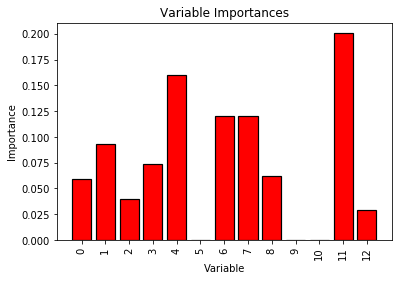

In [188]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

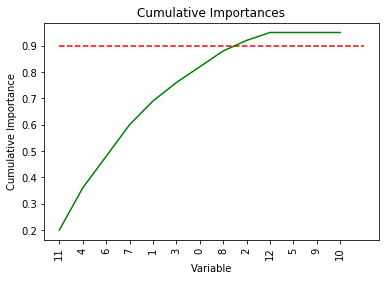

In [189]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [190]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:10]]

X = pd.DataFrame(X)

# Create training and testing sets with only the important features
important_X = X[important_feature_names] # this removes unimportant features
y = y # y remains the same

# implementing train-test-split on important features
X_train, X_test, y_train, y_test = train_test_split(important_X, y, test_size=0.40, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

# AUC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
base_roc_auc = auc(false_positive_rate, true_positive_rate)
base_roc_auc

0.5

# Hyper Parameter Tuning

In [191]:
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint
import matplotlib.pyplot as plt


# Number of trees in random forest
n_estimators= [10,20,25,30]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [5,10,15,20]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 25, 30]}


In [192]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation: i.e. "20 percent is used for testing"
# search across 25 different combinations, and use all available cores

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                                n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Jonathan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.8s finished
C:\Users\Jonathan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [193]:
rfc_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [197]:
# implementing train-test-split on important features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=30,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',
                             max_depth = 5, bootstrap = True,random_state=1)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

# AUC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
final_roc_auc= auc(false_positive_rate, true_positive_rate)
final_roc_auc

0.8333333333333333